In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
from fastai import *
from fastai.tabular import *

from python.

In [3]:
from pathlib import Path

path = Path('~/data_work/wine_review_analysis')

In [4]:
data_path = path/'wine-reviews'

wine_data = pd.read_csv(data_path/'winemag-data-130k-v2.csv')

In [5]:
clean_wine_data = wine_data[wine_data['price'].notna()]

In [6]:
procs = [FillMissing, Categorify, Normalize]

In [8]:
valid_idx = range(len(clean_wine_data)-int(len(clean_wine_data)*.2), len(clean_wine_data))



In [9]:
clean_wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [10]:
test_vars = ['country', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name',
       'variety', 'winery']
model_data = clean_wine_data[test_vars]
model_data.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'variety', 'winery'],
      dtype='object')

In [13]:
dep_var = 'price'
cat_names = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'taster_name', 'winery']



In [44]:
data = TabularDataBunch.from_df(path, model_data, dep_var
                                , valid_idx=valid_idx, procs=procs, cat_names=cat_names
                                , bs = 5000)




In [45]:
learn = tabular_learner(data, layers=[200,100], metrics= mean_squared_error)



In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


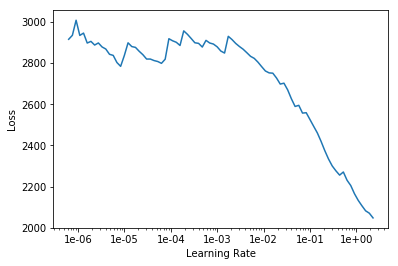

In [47]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss
1,2334.526123,2794.675293


In [37]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,mean_squared_error


AttributeError: 'numpy.float32' object has no attribute 'detach'

In [39]:
import pytorch

ModuleNotFoundError: No module named 'pytorch'

In [ ]:
import fastai

In [49]:
fastai.__version__

'1.0.34'

In [50]:
fastai.metrics.__all__

['error_rate',
 'accuracy',
 'accuracy_thresh',
 'dice',
 'exp_rmspe',
 'fbeta',
 'Fbeta_binary']